# Plots for the following research questions:
* Number of stories created each year based on creation date?
* Average time to finish a story? Search for completed stories, take difference between modify and create date.
* Average number of parts per story (for completed stories)?
* Does length of read count correlate to a certain story length? Does read count correlate to number of parts per story?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
plotdf=pd.read_csv('Data/stories_for_viz.csv')

In [3]:
plotdf.columns

Index(['id', 'title', 'description', 'url', 'createDate', 'modifyDate',
       'completed', 'numParts', 'deleted', 'length', 'categoryId',
       'categoryName', 'languageId', 'languageName', 'mature', 'rating',
       'tags', 'commentCount', 'readCount', 'voteCount', 'userAvatar',
       'userFullname', 'userName'],
      dtype='object')

In [4]:
plotdf.head(2)

,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,languageName,mature,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName
0,12050237,Hadar #Watty2014,"Fina is a Enforcers Daughter, she's been harsh...",https://www.wattpad.com/story/12050237-hadar-w...,2014-01-29T16:24:42Z,2015-01-27T10:47:41Z,True,37,False,407525,...,English,False,3,"['alpha', 'curse', 'luna', 'magic', 'power', '...",5187,2688905,106844,https://a.wattpad.com/useravatar/RevyRogue.128...,Reviana,RevyRogue
1,42937930,❇awsome comebacks❇,yessss!!!!,https://www.wattpad.com/story/42937930-%E2%9D%...,2015-06-22T23:55:09Z,2015-08-16T08:07:12Z,True,16,False,2204,...,English,False,0,"['dumb', 'funny', 'listen', 'nothing', 'okay']",9738,1344254,37258,https://a.wattpad.com/useravatar/kittygirl_121...,NaN,kittygirl_121604


In [5]:
#Pull Year from createDate and add as Year column
plotdf["year"]=""
plotdf["timediff"]=""
date=plotdf.at[0,"createDate"]
year=datetime.strptime(date,"%Y-%m-%dT%H:%M:%SZ").strftime("%Y")
for r in range(len(plotdf.index)):
    cdate=datetime.strptime(plotdf.at[r,"createDate"],"%Y-%m-%dT%H:%M:%SZ")
    mdate=datetime.strptime(plotdf.at[r,"modifyDate"],"%Y-%m-%dT%H:%M:%SZ")
    plotdf.at[r,"year"]=datetime.strftime(cdate,"%Y")
    plotdf.at[r,"timediff"]=(mdate-cdate).days
plotdf.head(2)


,id,title,description,url,createDate,modifyDate,completed,numParts,deleted,length,...,rating,tags,commentCount,readCount,voteCount,userAvatar,userFullname,userName,year,timediff
0,12050237,Hadar #Watty2014,"Fina is a Enforcers Daughter, she's been harsh...",https://www.wattpad.com/story/12050237-hadar-w...,2014-01-29T16:24:42Z,2015-01-27T10:47:41Z,True,37,False,407525,...,3,"['alpha', 'curse', 'luna', 'magic', 'power', '...",5187,2688905,106844,https://a.wattpad.com/useravatar/RevyRogue.128...,Reviana,RevyRogue,2014,362
1,42937930,❇awsome comebacks❇,yessss!!!!,https://www.wattpad.com/story/42937930-%E2%9D%...,2015-06-22T23:55:09Z,2015-08-16T08:07:12Z,True,16,False,2204,...,0,"['dumb', 'funny', 'listen', 'nothing', 'okay']",9738,1344254,37258,https://a.wattpad.com/useravatar/kittygirl_121...,NaN,kittygirl_121604,2015,54


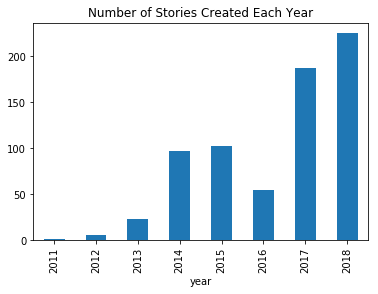

In [15]:
yeargroup=plotdf["id"].groupby(plotdf["year"]).count()
yeargroup.plot.bar()
plt.title("Number of Stories Created Each Year")
plt.savefig('Images/Stories_Created_by_Year.png')
plt.show()

In [12]:
completestories_df=plotdf.loc[(plotdf["completed"] ==True)]
avgtimetocomplete=round(completestories_df["timediff"].mean())
avgnumparts=round(completestories_df["numParts"].mean())
output=pd.DataFrame({"Average Time to Complete (days)":avgtimetocomplete,"Average Number of Chapters":avgnumparts},index=[0])
output

,Average Number of Chapters,Average Time to Complete (days)
0,12,244.0


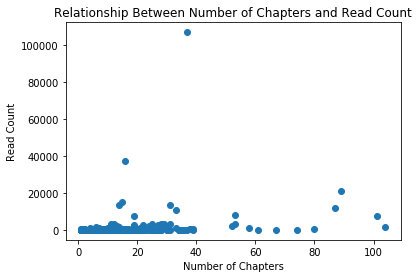

In [16]:
#readcount vs numparts
plt.scatter(plotdf["numParts"],plotdf["voteCount"])
plt.title("Relationship Between Number of Chapters and Read Count")
plt.xlabel("Number of Chapters")
plt.ylabel("Read Count")
# plt.xlim(0,50)
plt.savefig('Images/Number_Chapters_Popularity.png')
plt.show()